## THE COVID TRACKING PROJECT
***

In [ ]:
#!python -m pip install --upgrade pip
import json
import requests
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

### States Current

In [31]:
url = "https://covidtracking.com/api/states"

payload = {}
headers= {}

response_current = requests.request("GET", url, headers=headers, data = payload)
#print(response_current.text.encode('utf8'))

json_data = json.loads(response_current.text)
df = pd.DataFrame(json_data)
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
df.set_index('date',inplace=True)
df.head(4)

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-07-23,AK,2684,186825,NaN,36.0,NaN,NaN,NaN,1.0,NaN,...,189509,0,0,250b2f86b7f497e40057c76c9c34280febdd150b,0,0,0,0,0,
2020-07-23,AL,74212,545315,NaN,1547.0,8995.0,NaN,1043.0,NaN,553.0,...,619527,33,457,29d01db66f27c6d51adb56e6fe0e730c9efce112,0,0,0,0,0,
2020-07-23,AR,36259,410221,NaN,480.0,2361.0,NaN,NaN,107.0,329.0,...,446480,6,44,dbee50032803a8275442e649c5d7c1c659ea6d99,0,0,0,0,0,
2020-07-23,AS,0,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1037,0,0,3ef0986f4a9bd86467f99f1466dc940a8b200448,0,0,0,0,0,


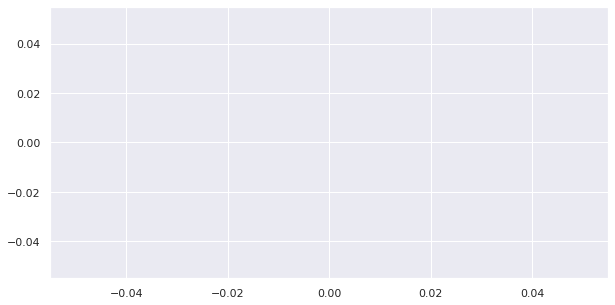

Error in callback <function flush_figures at 0x7f5136e66e60> (for post_execute):


KeyboardInterrupt: 

In [32]:
for col in df.columns:
    try:
        plt.figure(figsize=(10,5))
        sns.lineplot(x='date', y=col, hue='state', data=df.reset_index())

        plt.title(col)
    except:
        pass

### States Daily

In [5]:
url = "https://covidtracking.com/api/states/daily"

payload = {}
headers= {}

response_daily = requests.request("GET", url, headers=headers, data = payload)
print(response_daily.text.encode('utf8'))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
json_data = json.loads(response_daily.text)
df = pd.DataFrame(json_data)
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
df.set_index('date',inplace=True)
df.head(4)

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-07-23,AK,2684.0,186825.0,NaN,36.0,NaN,NaN,NaN,1.0,NaN,...,189509,0,0,250b2f86b7f497e40057c76c9c34280febdd150b,0,0,0,0,0,
2020-07-23,AL,74212.0,545315.0,NaN,1547.0,8995.0,NaN,1043.0,NaN,553.0,...,619527,33,457,29d01db66f27c6d51adb56e6fe0e730c9efce112,0,0,0,0,0,
2020-07-23,AR,36259.0,410221.0,NaN,480.0,2361.0,NaN,NaN,107.0,329.0,...,446480,6,44,dbee50032803a8275442e649c5d7c1c659ea6d99,0,0,0,0,0,
2020-07-23,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1037,0,0,3ef0986f4a9bd86467f99f1466dc940a8b200448,0,0,0,0,0,


In [22]:
df.sort_values('death',ascending=False)[['state','death']]['state'].unique()

array(['NY', 'NJ', 'MA', 'CA', 'IL', 'PA', 'MI', 'FL', 'TX', 'CT', 'LA',
       'MD', 'GA', 'OH', 'AZ', 'IN', 'VA', 'NC', 'CO', 'MN', 'WA', 'MS',
       'AL', 'SC', 'MO', 'RI', 'TN', 'WI', 'IA', 'NV', 'KY', 'NM', 'DC',
       'DE', 'OK', 'NH', 'AR', 'NE', 'KS', 'OR', 'UT', 'PR', 'ID', 'SD',
       'ME', 'WV', 'ND', 'VT', 'MT', 'WY', 'HI', 'AK', 'VI', 'GU', 'MP',
       'AS'], dtype=object)

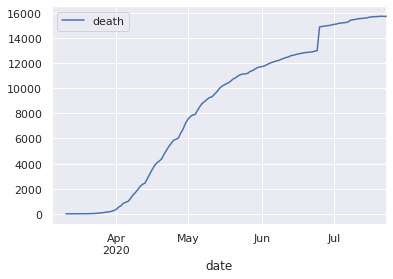

In [27]:
df.loc[df['state']=='NJ',['death']].plot()

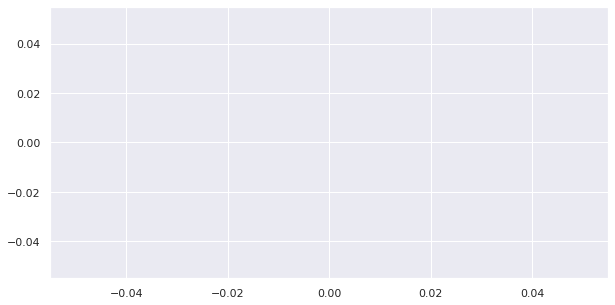

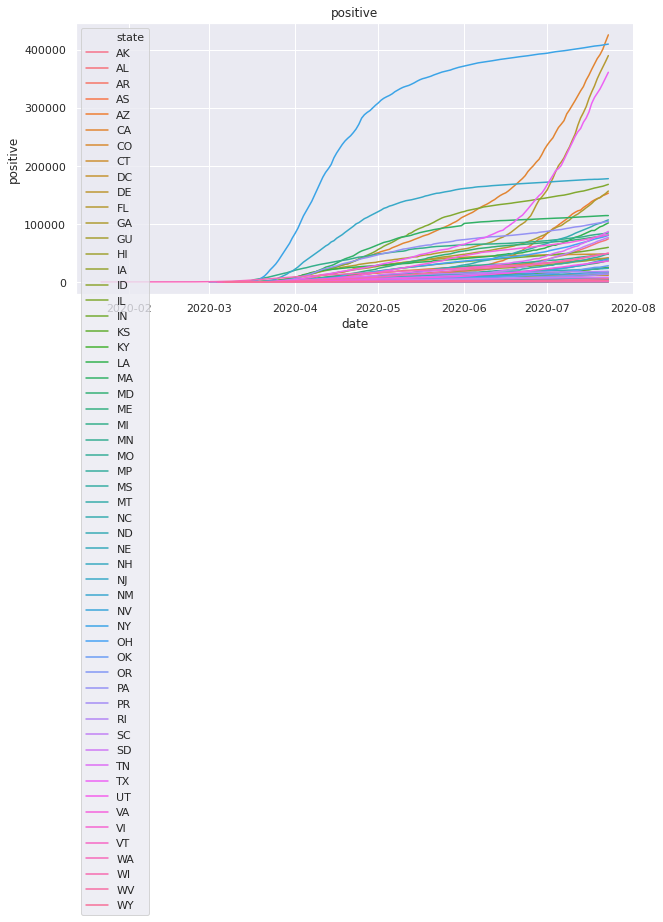

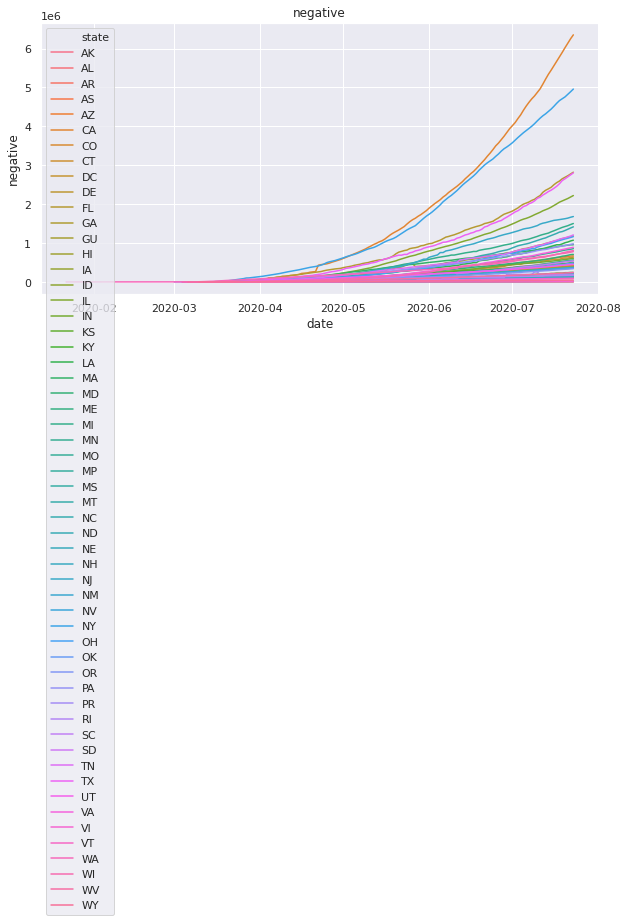

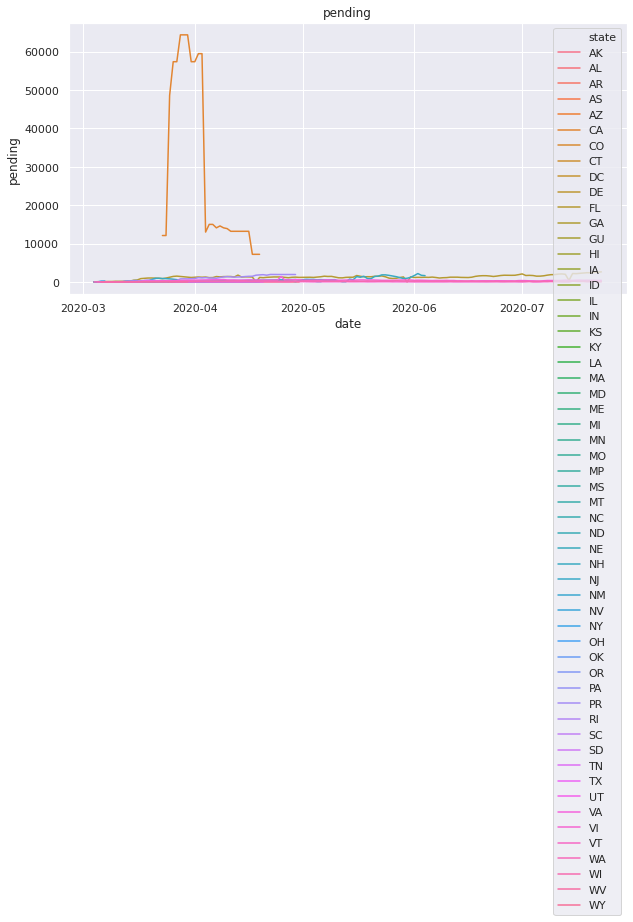

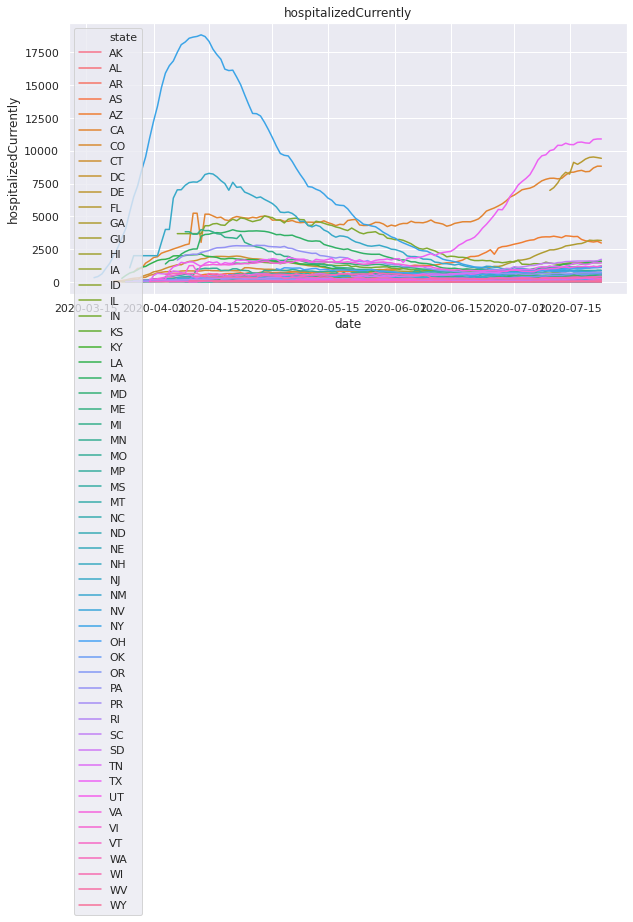

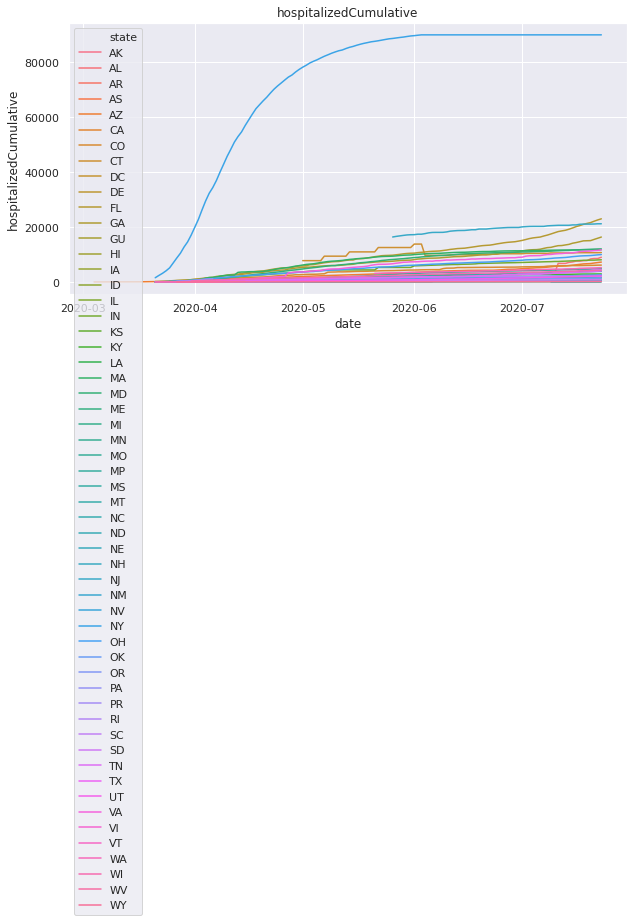

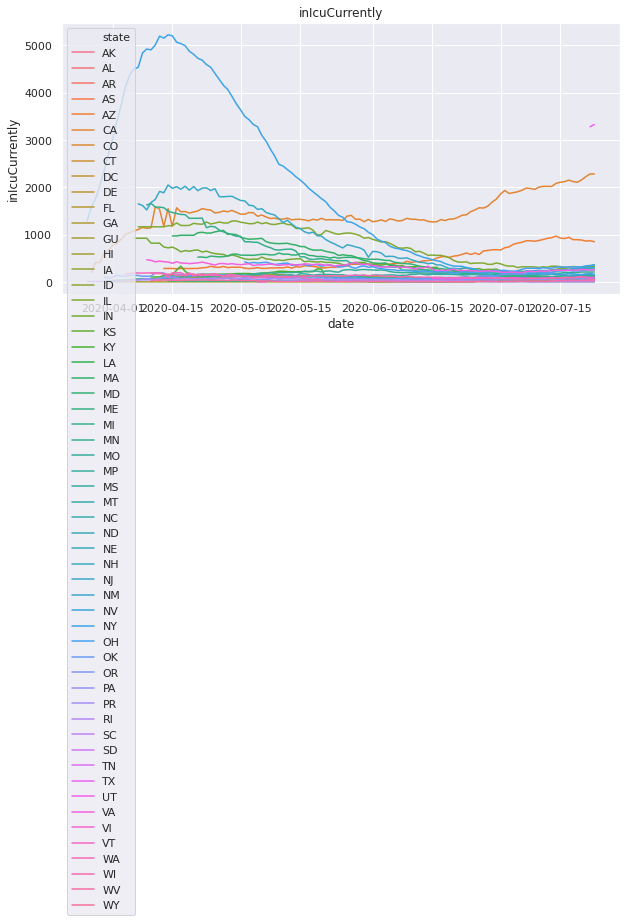

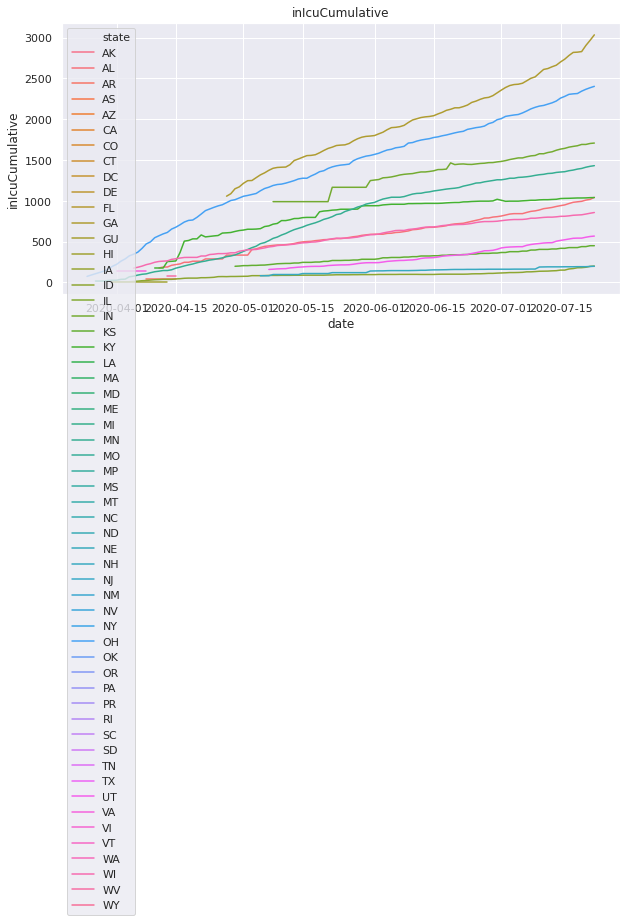

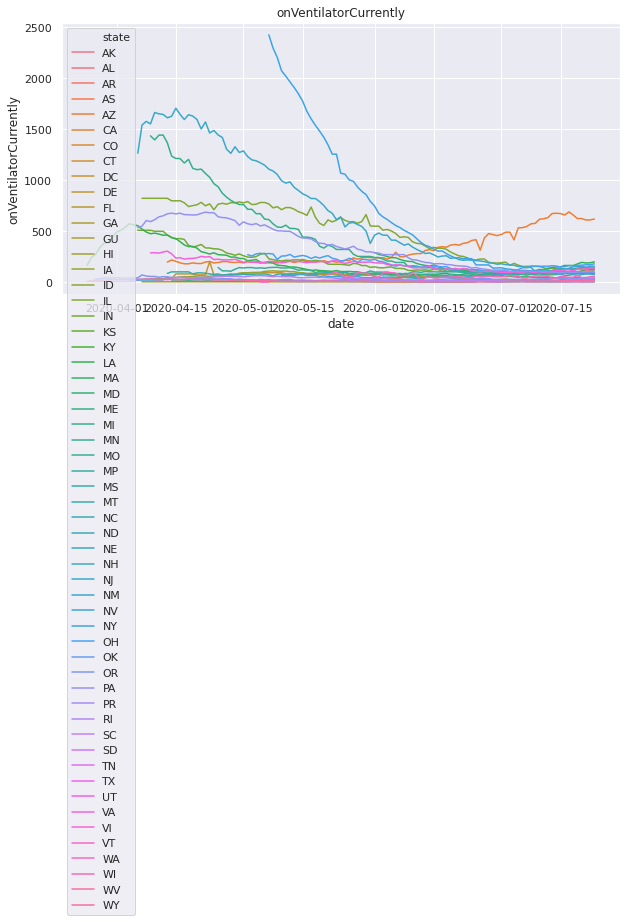

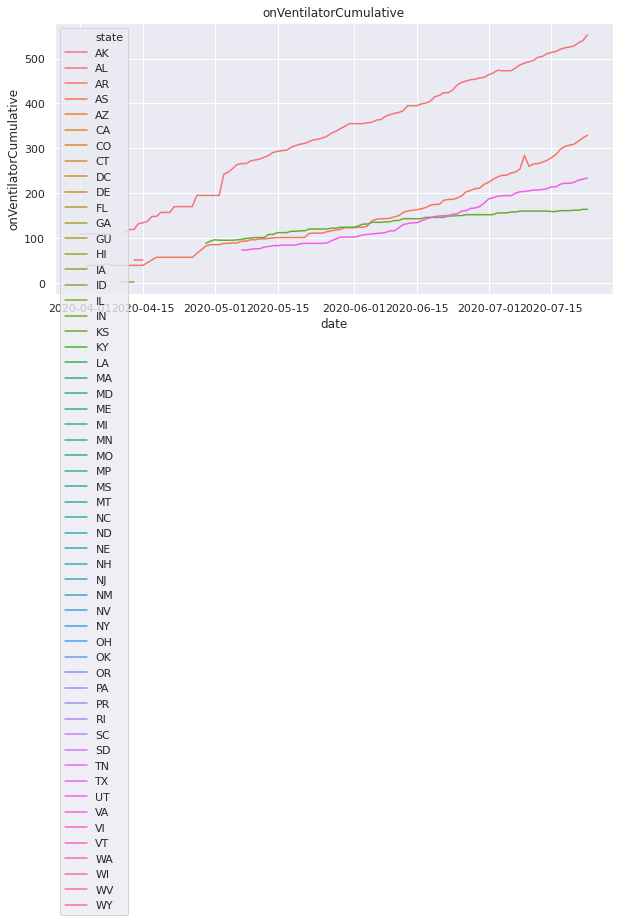

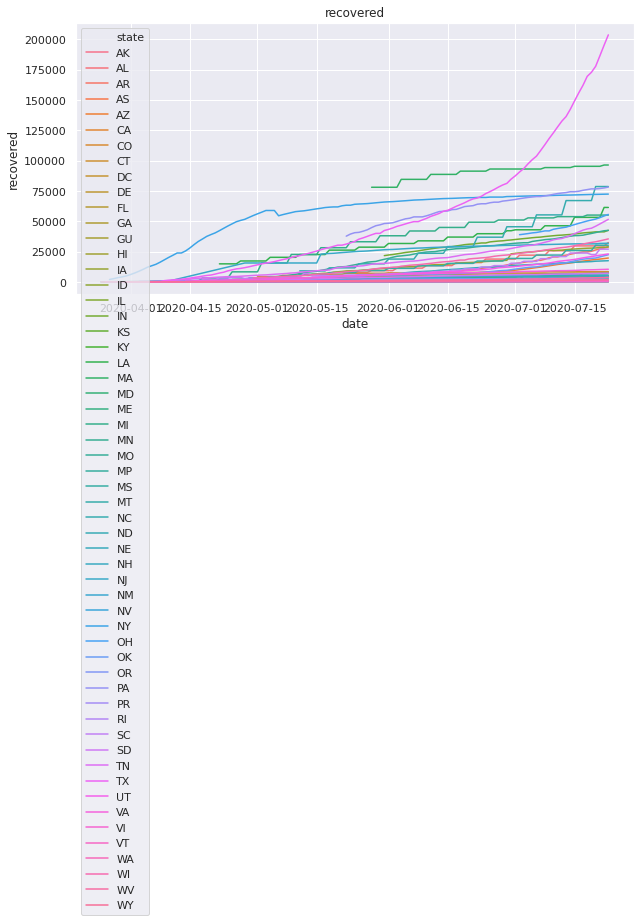

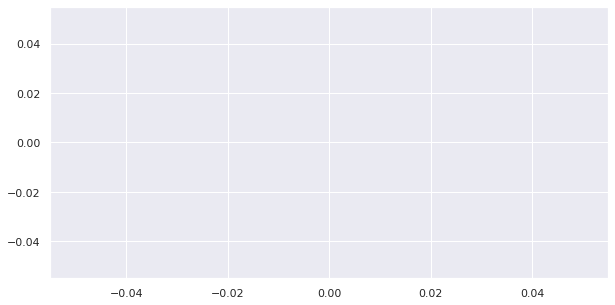

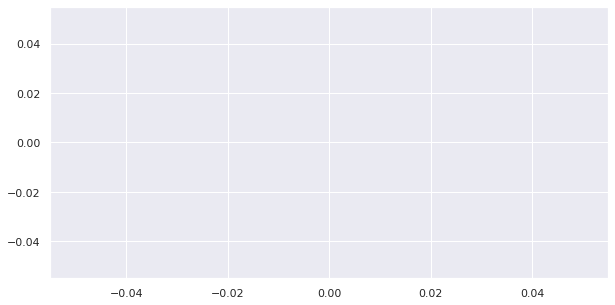

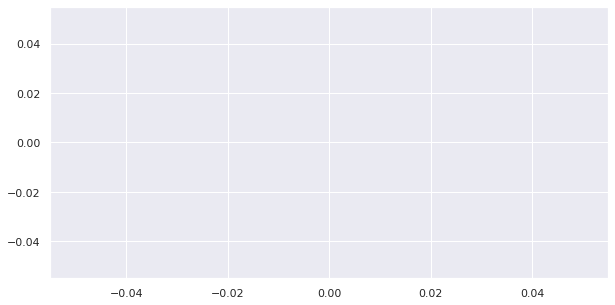

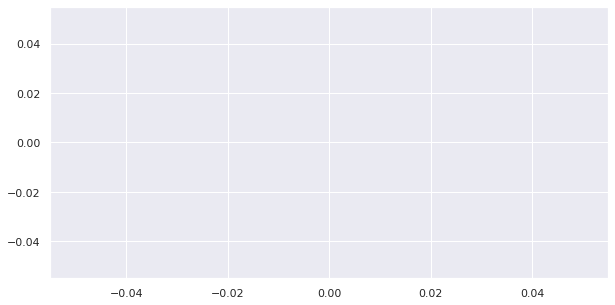

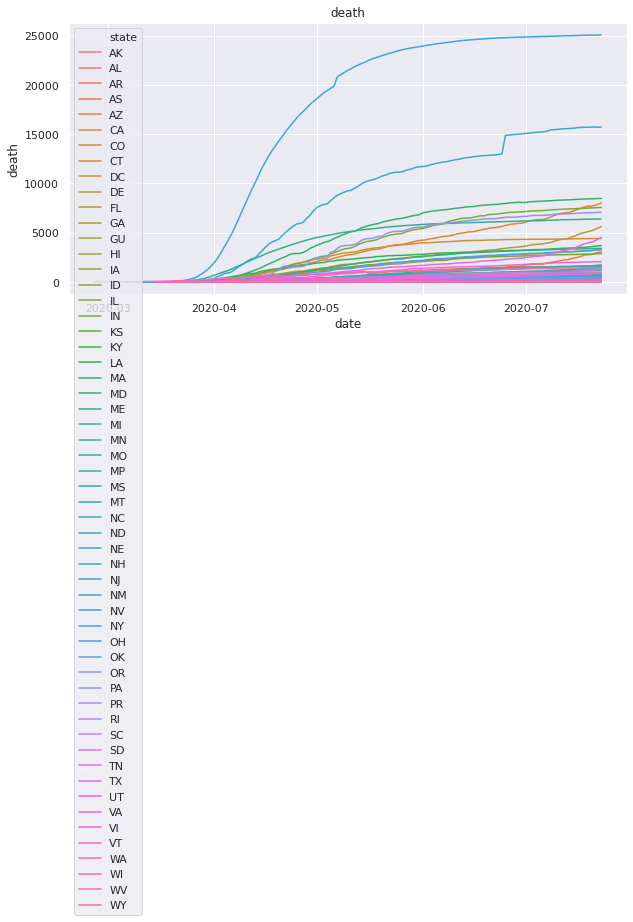

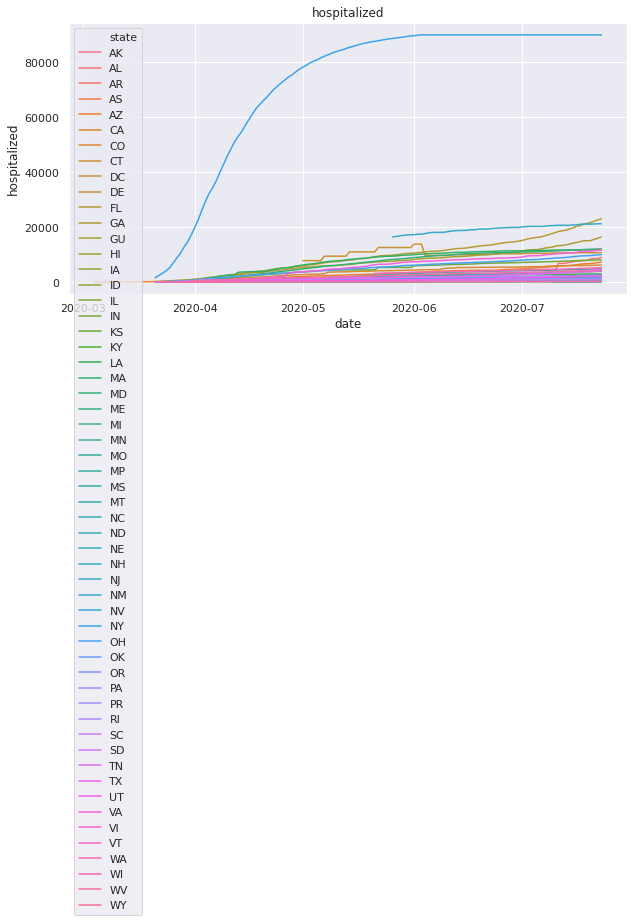

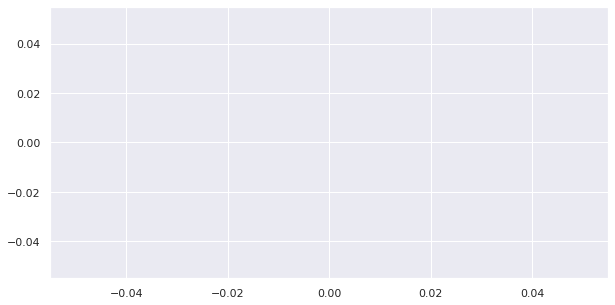

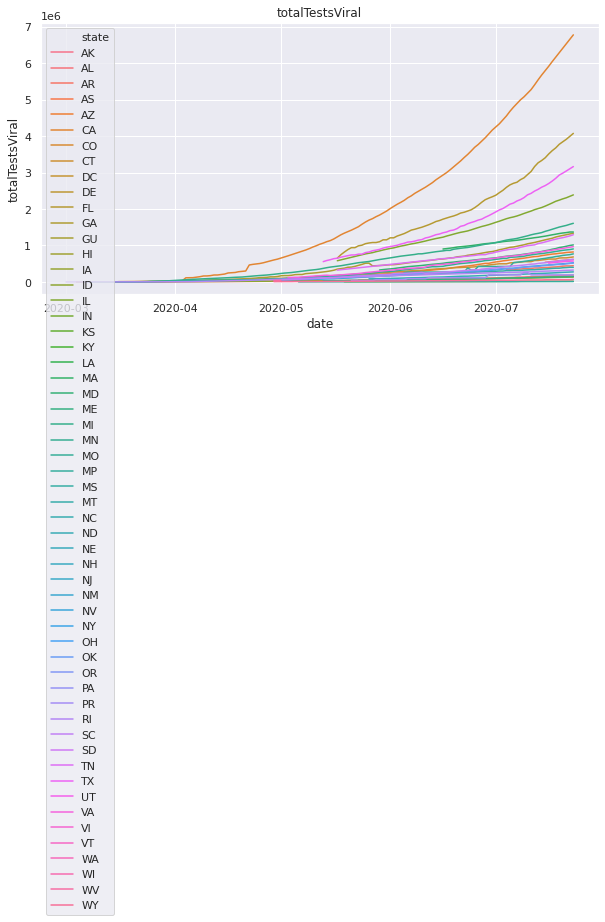

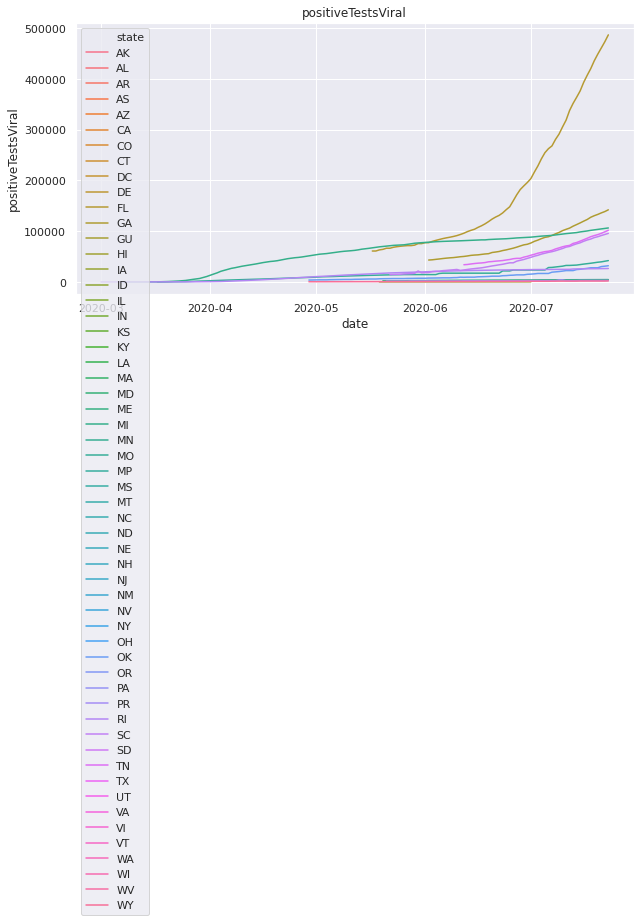

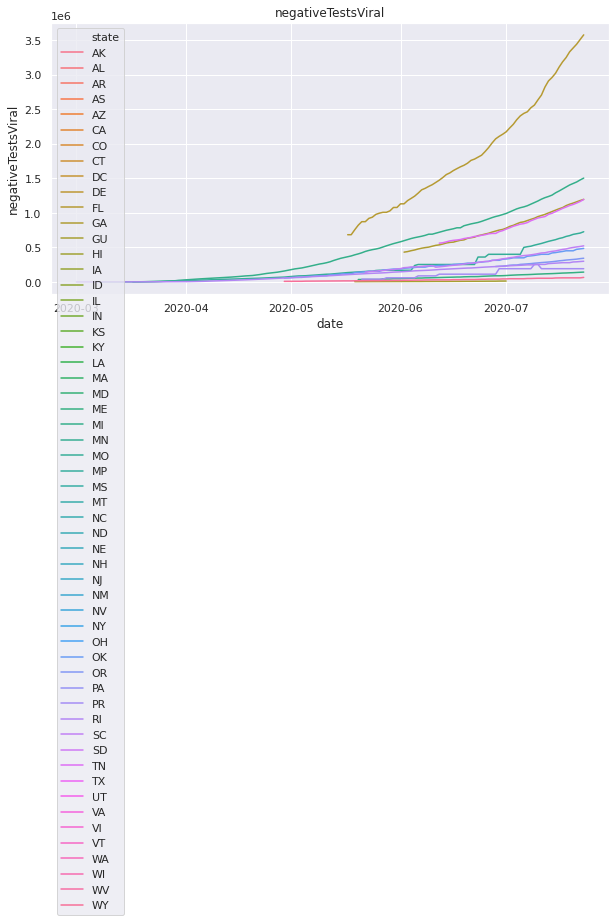

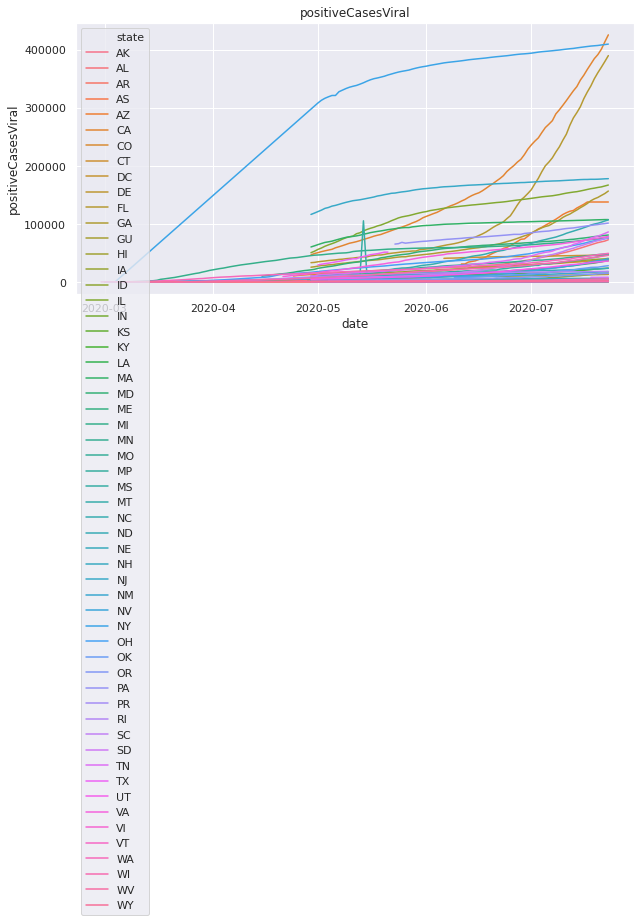

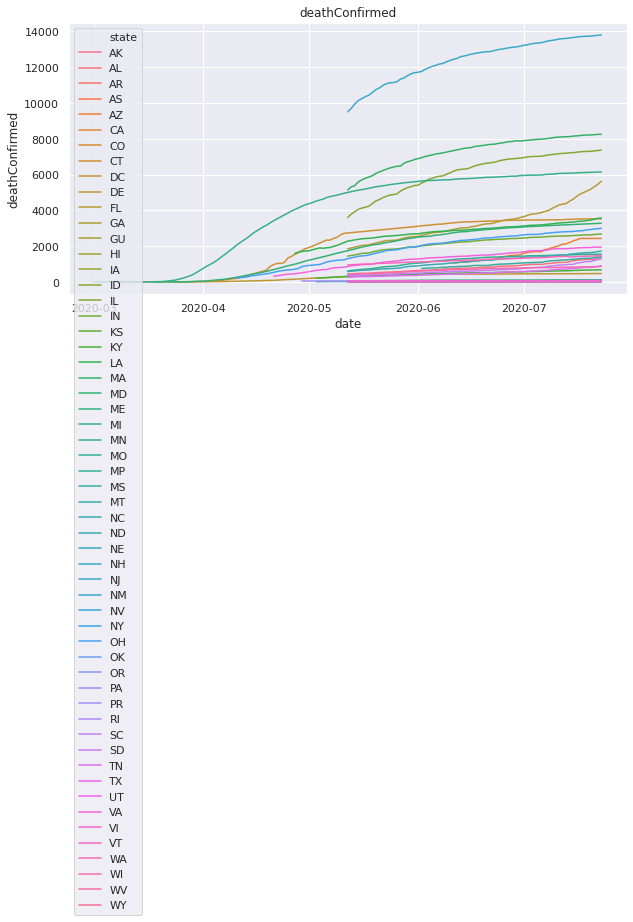

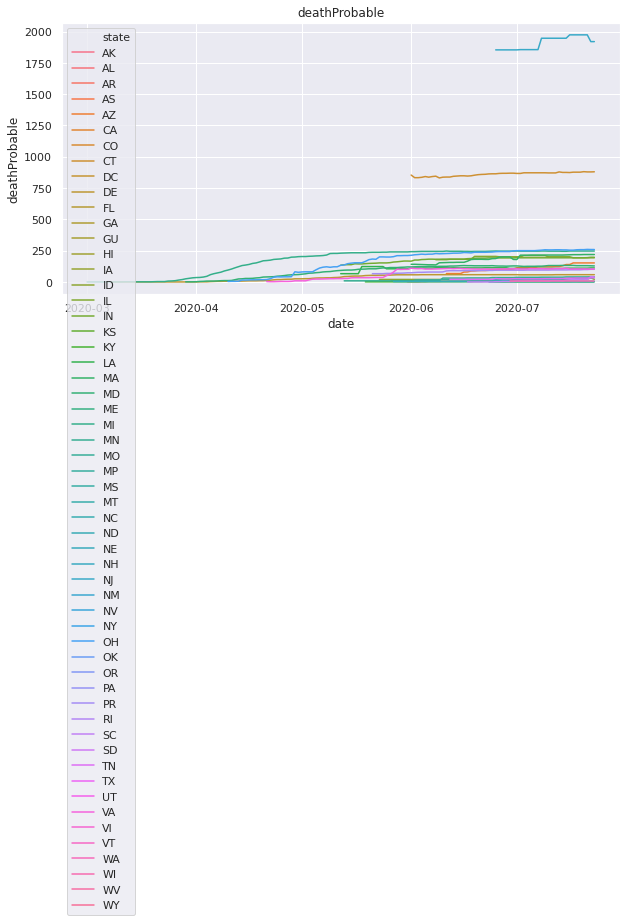

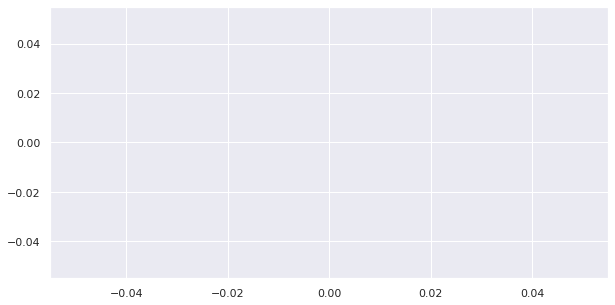

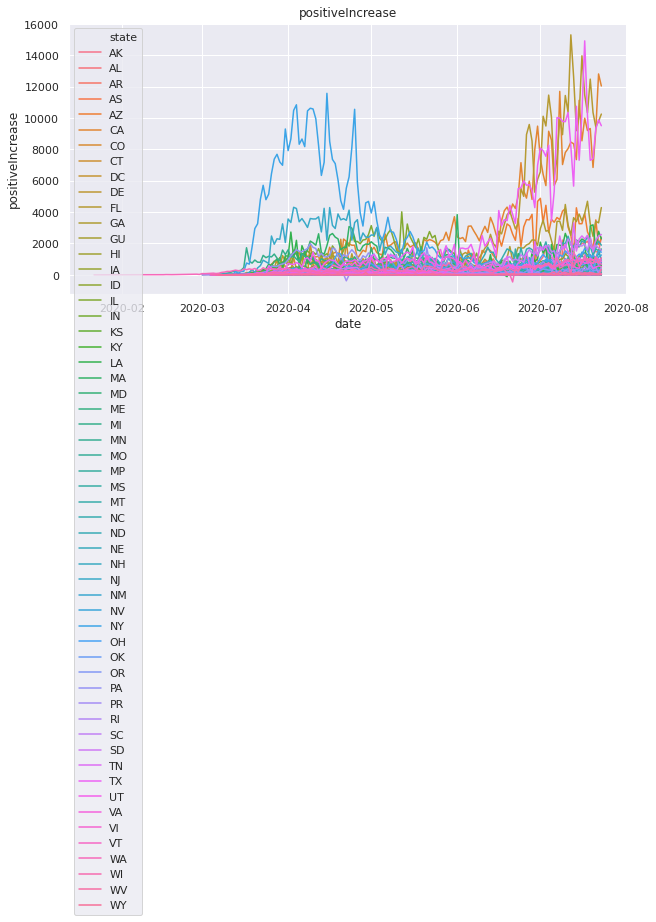

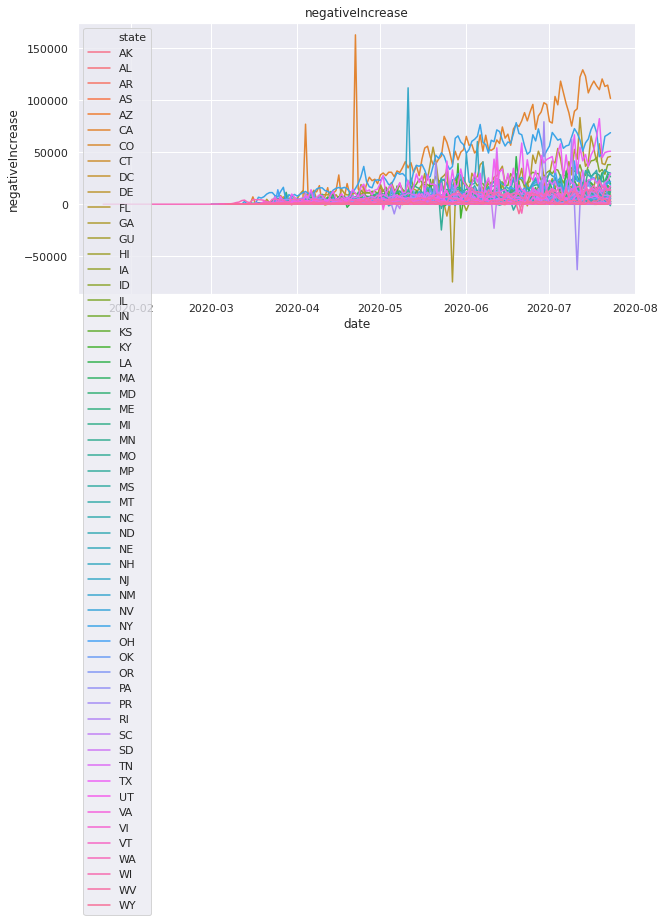

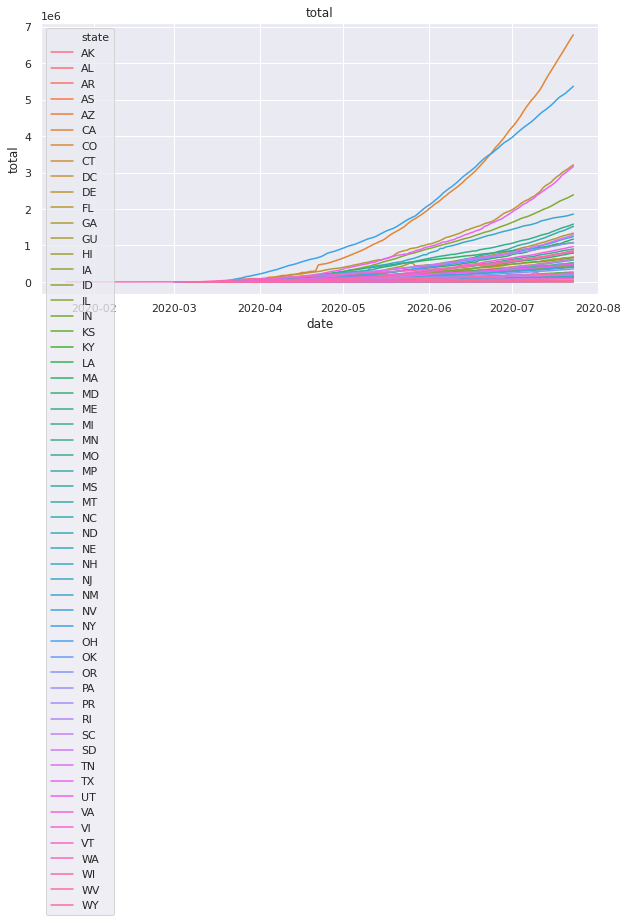

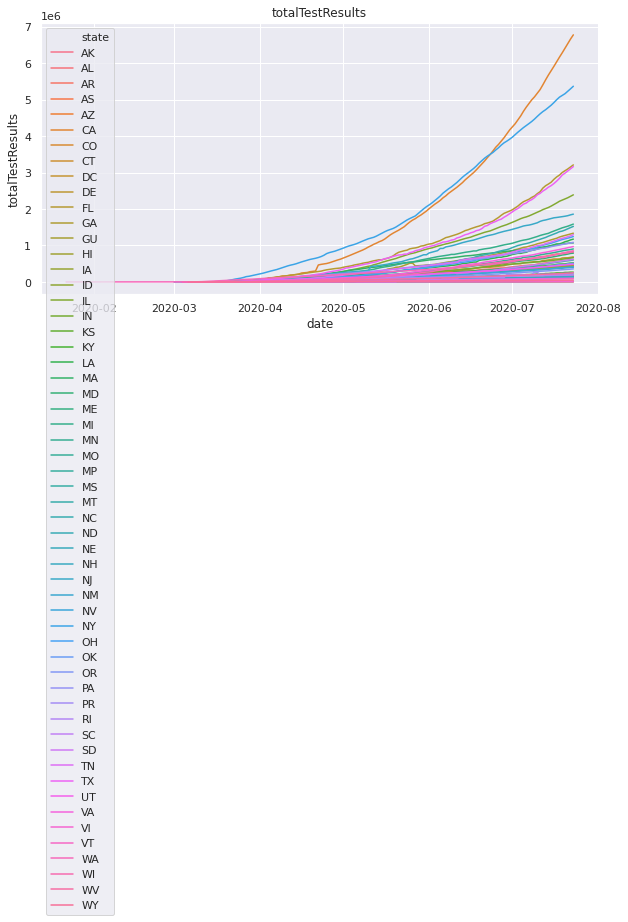

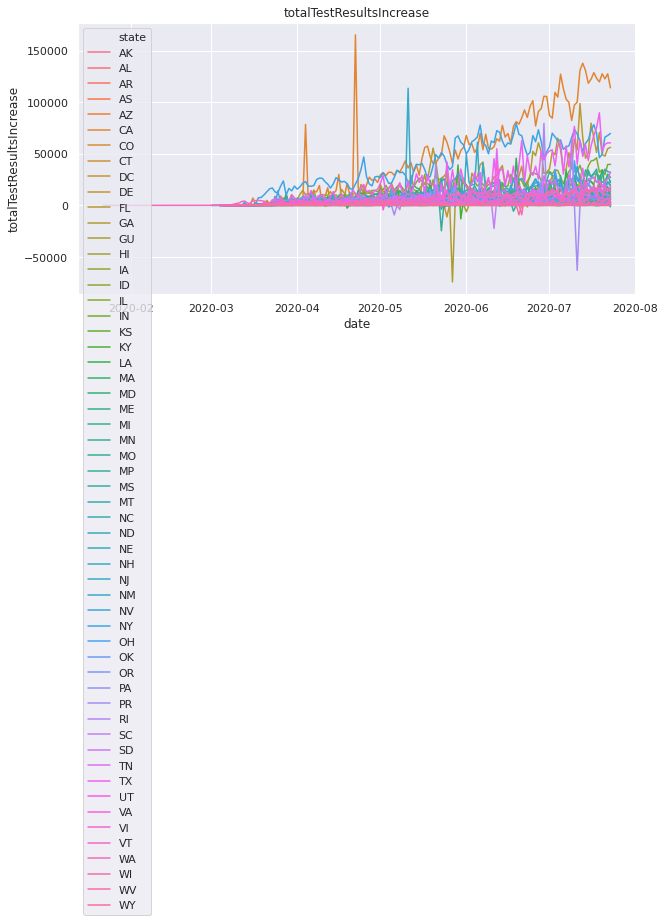

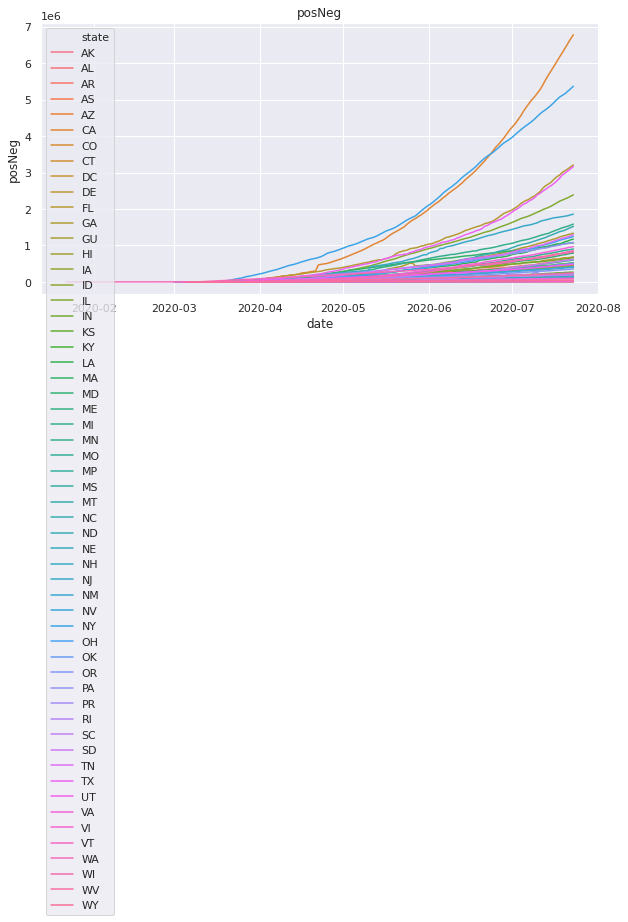

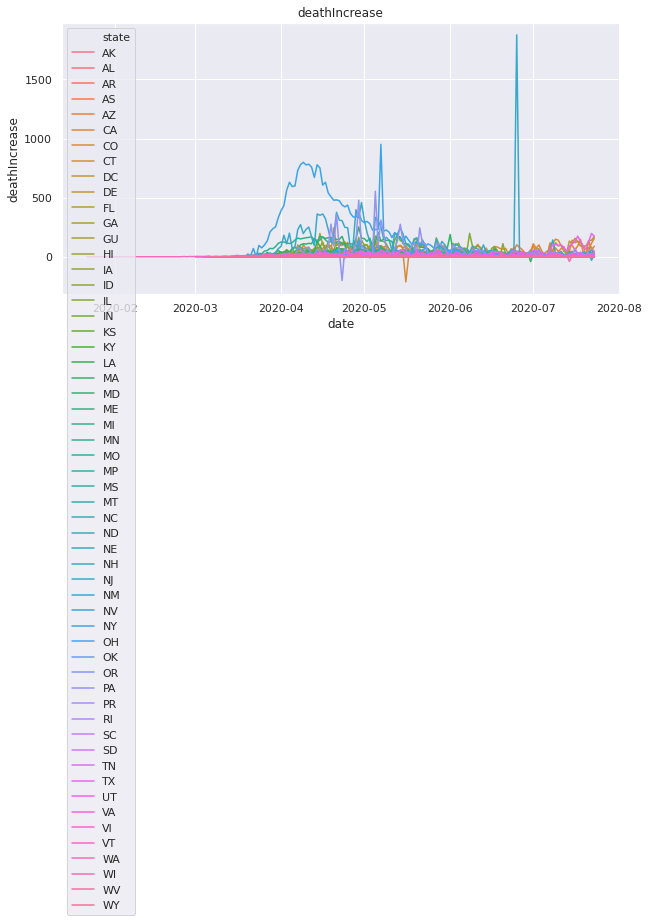

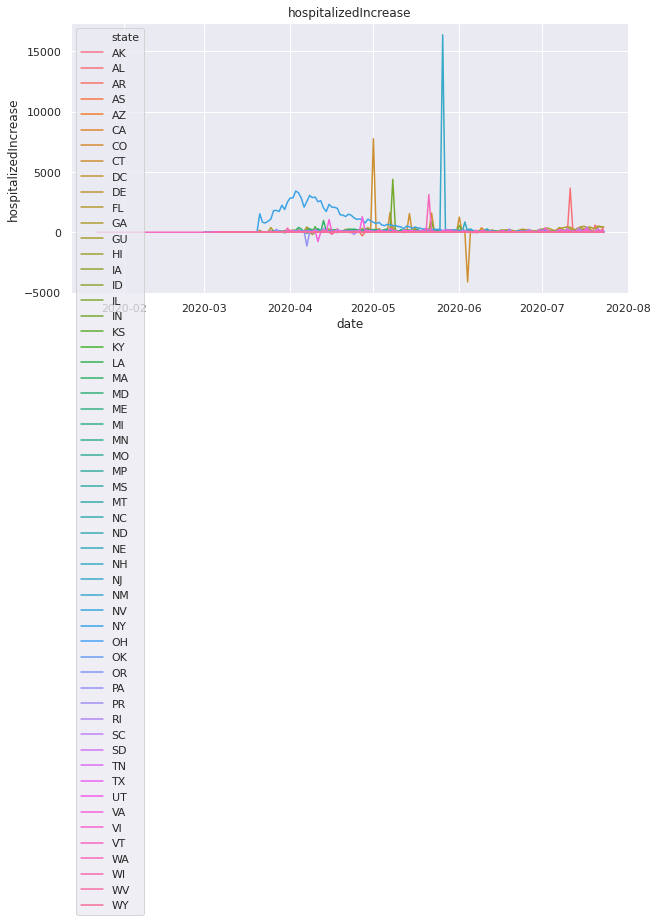

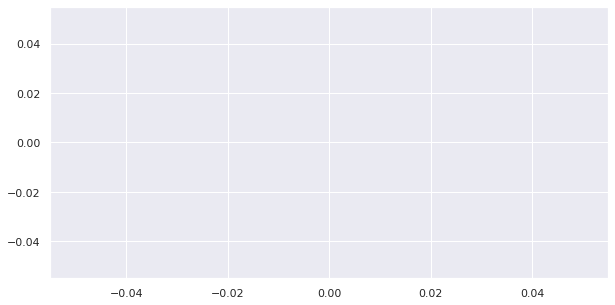

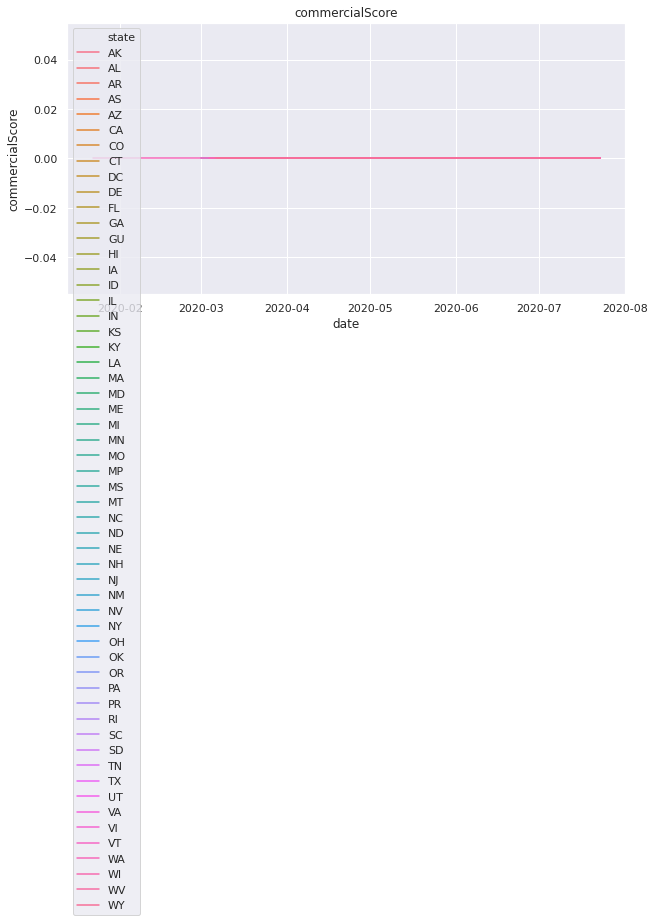

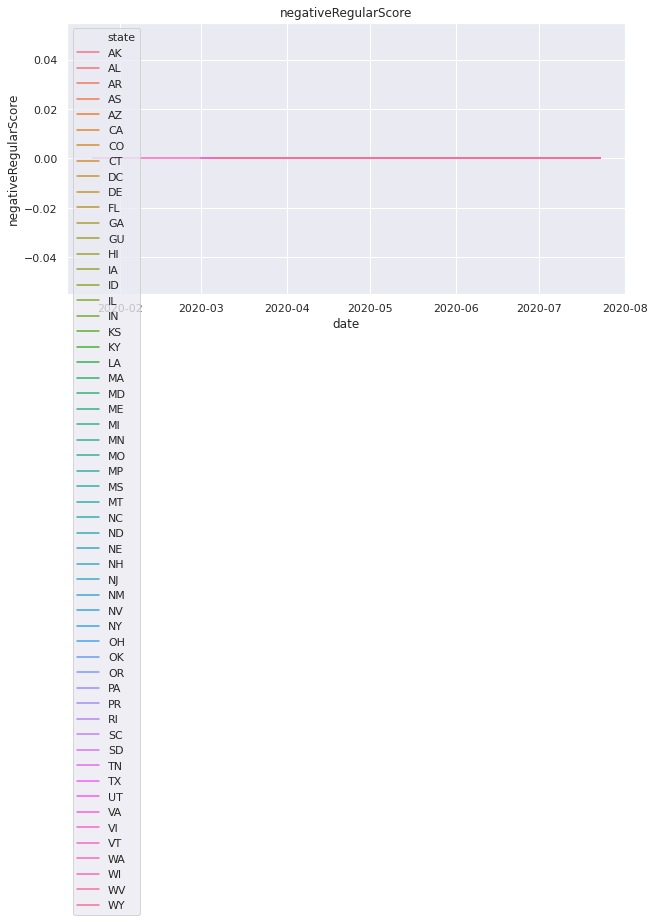

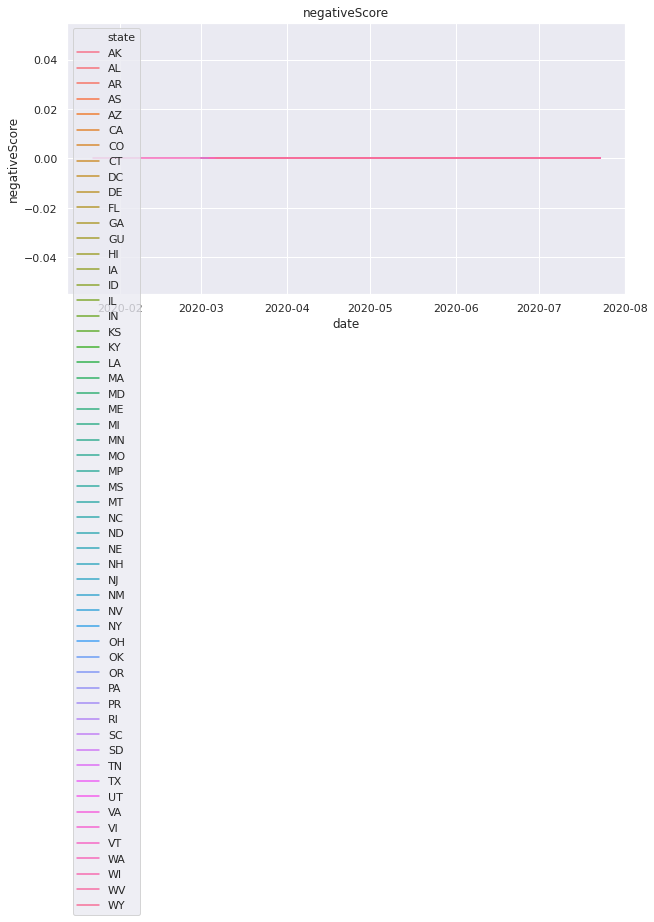

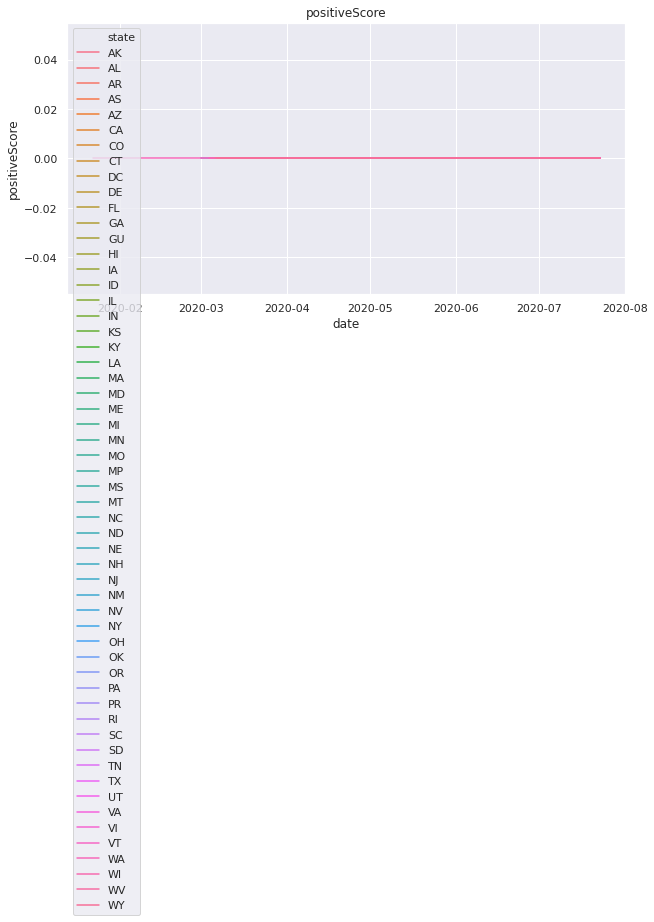

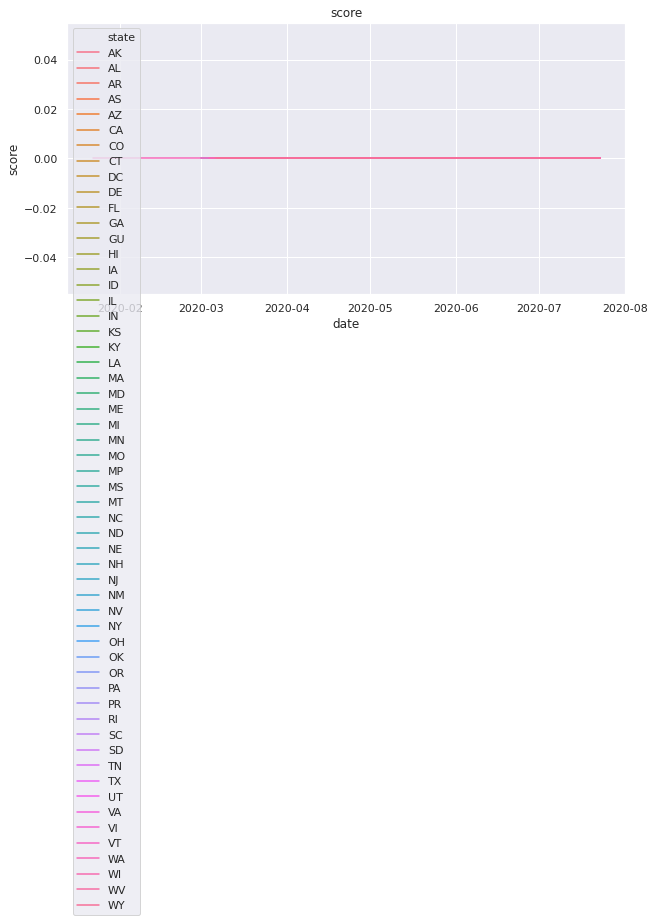

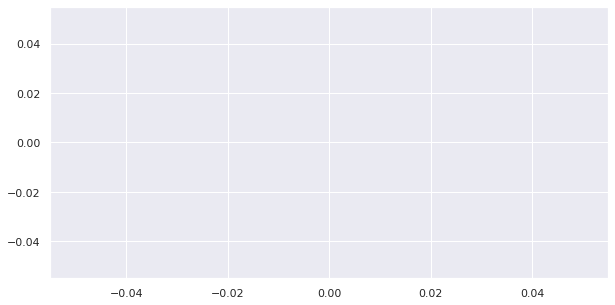

In [7]:
for col in df.columns:
    try:
        plt.figure(figsize=(10,5))
        sns.lineplot(x='date', y=col, hue='state', data=df.reset_index())
        plt.title(col)
    except:
        pass

### States info

In [8]:
url = "https://covidtracking.com/api/states/info"

payload = {}
headers= {}

response_info = requests.request("GET", url, headers=headers, data = payload)

#print(response_info.text.encode('utf8'))

In [9]:
json_data = json.loads(response_info.text)
df = pd.DataFrame(json_data)
df.head(4)

,state,notes,covid19Site,covid19SiteSecondary,covid19SiteTertiary,twitter,covid19SiteOld,name,fips,pui,pum
0,AK,Negatives = (Totals – Positives)\nPositives oc...,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,https://alaska-dhss.maps.arcgis.com/apps/opsda...,@Alaska_DHSS,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,Alaska,02,,False
1,AL,Negatives = (Totals - Positives) \nPositives o...,https://alpublichealth.maps.arcgis.com/apps/op...,https://dph1.adph.state.al.us/covid-19/,,@alpublichealth,http://www.alabamapublichealth.gov/infectiousd...,Alabama,01,,False
2,AR,None,https://www.healthy.arkansas.gov/programs-serv...,https://adem.maps.arcgis.com/apps/opsdashboard...,,@adhpio,https://www.healthy.arkansas.gov/programs-serv...,Arkansas,05,,False
3,AS,AS does not have a regularly updated data sour...,https://www.americansamoa.gov/covid-19-advisories,https://www.facebook.com/amsamgov/,,,http://www.samoagovt.ws/2020/03/ministry-of-he...,American Samoa,60,,False


### US Current

In [10]:
url = "http://covidtracking.com/api/us"

payload = {}
headers= {}

response_US_Current = requests.request("GET", url, headers=headers, data = payload)

#print(response.text.encode('utf8'))

In [11]:
json_data = json.loads(response_US_Current.text)
df = pd.DataFrame(json_data)
df.head(4)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200723,56,4017735,44777235,3179,59846,286329,10466,12933,2472,...,2020-07-23T00:00:00Z,48798149,48794970,48794970,1039,2500,703166,71027,774193,47fbfb79cfdffb69204595f0de103f01166b7424


### US Daily

In [12]:
url = "https://covidtracking.com/api/us/daily"

payload = {}
headers= {}

response_US_Daily = requests.request("GET", url, headers=headers, data = payload)

#print(response.text.encode('utf8'))

In [13]:
json_data = json.loads(response_US_Daily.text)
df = pd.DataFrame(json_data)
df.head(4)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200723,56,4017735,44777235,3179.0,59846.0,286329.0,10466.0,12933.0,2472.0,...,2020-07-23T00:00:00Z,48798149,48794970,48794970,1039,2500,703166,71027,774193,47fbfb79cfdffb69204595f0de103f01166b7424
1,20200722,56,3946708,44074069,3051.0,59628.0,283829.0,10457.0,12790.0,2440.0,...,2020-07-22T00:00:00Z,48023828,48020777,48020777,1117,2248,726352,69150,795502,1fb9827aa2d62689f16d74282dbefd9bb89e4a54
2,20200721,56,3877558,43347717,3197.0,59316.0,281581.0,6711.0,12629.0,2414.0,...,2020-07-21T00:00:00Z,47228472,47225275,47225275,1038,2551,686606,63642,750248,3540b85299a0876949457ef82d73f2d30f87ef58
3,20200720,56,3813916,42661111,3003.0,58338.0,279030.0,6558.0,12475.0,2403.0,...,2020-07-20T00:00:00Z,46478030,46475027,46475027,362,1647,654044,56971,711015,4aeca501d8d04f10423adc9db2622d1dc9afd933
